In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
import datetime as dt
import yaml
from pandas.tseries import offsets
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, NullLocator)
import matplotlib.dates as mdates

In [217]:
swq = pd.read_csv('../input/RadarBoxSWQ20200112-20200416.csv', sep='|', quotechar='"')

In [218]:
wal = pd.read_csv('../input/RadarBoxWAL20200116-20200408.csv', sep='|', quotechar='"')

In [219]:
swq.head()

,Date,Flight,Departure,STD,Arrival,STA,Aircraft,Status,Duration
0,31-Mar,WQ3507,"El Paso, TX (ELP/KELP)",18:40 MDT,"Phoenix, AZ (AZA/KIWA)",-,B733 (N529AU),Landed 17:28 MST,00h52m
1,31-Mar,WQ3521,"San Diego, CA (SAN/KSAN)",-,"Phoenix, AZ (AZA/KIWA)",-,B733 (N531AU),Landed 17:41 MST,00h51m
2,31-Mar,WQ3601,"Laredo, TX (LRD/KLRD)",17:50 CDT,"Alexandria, LA (AEX/KAEX)",-,B734 (N285XA),Landed 19:18 CDT,01h11m
3,31-Mar,WQ3520,"Victorville, CA (VCV/KVCV)",15:00 PDT,"San Diego, CA (SAN/KSAN)",-,B733 (N531AU),Landed 15:21 PDT,00h32m
4,31-Mar,WQ3570,"Alexandria, LA (AEX/KAEX)",16:55 CDT,"Brownsville, TX (BRO/KBRO)",-,B734 (N418US),Landed,01h12m


In [220]:
wal.head()

,Date,Flight,Departure,STD,Arrival,STA,Aircraft,Status,Duration
0,8 Apr,WAL700,"Charlotte, NC(CLT/KCLT)",-,"Miami, FL(MIA/KMIA)",-,MD83 (N801WA),Landed 18:17 EDT,01h26m
1,8 Apr,WAL9700,"Charlotte, NC(CLT/KCLT)",15:30 EDT,"Miami, FL(MIA/KMIA)",-,MD83,Landed,01h27m
2,8 Apr,WAL700,Basseterre(SKB/TKPK),10:00 AST,"Charlotte, NC(CLT/KCLT)",-,MD83 (N801WA),Landed 15:13 EDT,04h07m
3,8 Apr,WAL9699,"Miami, FL(MIA/KMIA)",05:45 EDT,Basseterre(SKB/TKPK),-,MD83 (N801WA),Landed,02h25m
4,4 Apr,WAL9700,"Charlotte, NC(CLT/KCLT)",-,"Miami, FL(MIA/KMIA)",-,MD83 (N801WA),Landed 19:56 EDT,01h26m


In [221]:
swq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 9 columns):
Date         5009 non-null object
Flight       5009 non-null object
Departure    5009 non-null object
STD          5009 non-null object
Arrival      5009 non-null object
STA          5009 non-null object
Aircraft     5009 non-null object
Status       5009 non-null object
Duration     5009 non-null object
dtypes: object(9)
memory usage: 352.3+ KB


In [222]:
wal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 9 columns):
Date         752 non-null object
Flight       752 non-null object
Departure    752 non-null object
STD          752 non-null object
Arrival      752 non-null object
STA          752 non-null object
Aircraft     752 non-null object
Status       752 non-null object
Duration     752 non-null object
dtypes: object(9)
memory usage: 53.0+ KB


In [223]:
swq['Date'] = [x + ' 2020' for x in swq['Date']]
wal['Date'] = [x + ' 2020' for x in wal['Date']]

In [224]:
swq['Date'] = pd.to_datetime(swq['Date'])
wal['Date'] = pd.to_datetime(wal['Date'])

In [225]:
swq['Airline'] = 'SwiftAir/iAero'
wal['Airline'] = 'World Atlantic'

In [226]:
swq = swq.replace('-', np.nan)
wal = wal.replace('-', np.nan)
swq = swq.replace(u'\xa0', ' ')
wal = wal.replace(u'\xa0', ' ')

In [227]:
swq = swq.sort_values(by='Date', ascending=False)

In [228]:
swq.set_index('Date').loc['2020-04-16']

,Flight,Departure,STD,Arrival,STA,Aircraft,Status,Duration,Airline
Date,,,,,,,,,
2020-04-16,WQ3572,"Brownsville, TX(BRO/KBRO)",17:20 CDT,"Alexandria, LA(AEX/KAEX)",NaN,B734 (N430XA),Landed,01h10m,SwiftAir/iAero
2020-04-16,WQ3511,NaN,NaN,NaN,NaN,B734 (N441US),Status N/A,NaN,SwiftAir/iAero
2020-04-16,WQ3510,"Miami, FL(MIA/KMIA)",NaN,"Columbus, GA(CSG/KCSG)",NaN,B734 (N441US),Status N/A,NaN,SwiftAir/iAero
2020-04-16,WQ3569,"Alexandria, LA(AEX/KAEX)",06:30 CDT,"Minneapolis, MN(MSP/KMSP)",NaN,B734 (N430XA),Landed 08:51 CDT,02h12m,SwiftAir/iAero
2020-04-16,WQ3570,"Minneapolis, MN(MSP/KMSP)",NaN,"Omaha, NE(OMA/KOMA)",NaN,B734 (N430XA),Landed 10:38 CDT,00h50m,SwiftAir/iAero
2020-04-16,WQ3513,"Alexandria, LA(AEX/KAEX)",11:05 CDT,"Brownsville, TX(BRO/KBRO)",NaN,B734,Landed,01h15m,SwiftAir/iAero
2020-04-16,WQ3511,"Columbus, GA(CSG/KCSG)",09:40 EDT,"Alexandria, LA(AEX/KAEX)",NaN,B734 (N441US),Landed,01h19m,SwiftAir/iAero
2020-04-16,WQ3571,"Omaha, NE(OMA/KOMA)",12:10 CDT,"Kansas City, MO(MCI/KMCI)",NaN,B734 (N430XA),Landed 12:06 CDT,00h29m,SwiftAir/iAero
2020-04-16,WQ3514,"Brownsville, TX(BRO/KBRO)",13:40 CDT,"Miami, FL(MIA/KMIA)",NaN,B734 (N441US),Landed 17:34 EDT,02h12m,SwiftAir/iAero


In [229]:
df = pd.concat([swq, wal], sort=False).reset_index(drop=True)

In [230]:
len(df)

5761

In [231]:
len(df.drop_duplicates())

5752

In [232]:
df=df.drop_duplicates()

In [233]:
df['Aircraft'] = df['Aircraft'].str.replace(u'\xa0', ' ')
df['Arrival'] = df['Arrival'].str.replace(u'\xa0', ' ')
df['Departure'] = df['Departure'].str.replace(u'\xa0', ' ')

In [234]:
df.head()

,Date,Flight,Departure,STD,Arrival,STA,Aircraft,Status,Duration,Airline
0,2020-04-16,WQ3572,"Brownsville, TX(BRO/KBRO)",17:20 CDT,"Alexandria, LA(AEX/KAEX)",NaN,B734 (N430XA),Landed,01h10m,SwiftAir/iAero
1,2020-04-16,WQ3511,NaN,NaN,NaN,NaN,B734 (N441US),Status N/A,NaN,SwiftAir/iAero
2,2020-04-16,WQ3510,"Miami, FL(MIA/KMIA)",NaN,"Columbus, GA(CSG/KCSG)",NaN,B734 (N441US),Status N/A,NaN,SwiftAir/iAero
3,2020-04-16,WQ3569,"Alexandria, LA(AEX/KAEX)",06:30 CDT,"Minneapolis, MN(MSP/KMSP)",NaN,B734 (N430XA),Landed 08:51 CDT,02h12m,SwiftAir/iAero
4,2020-04-16,WQ3570,"Minneapolis, MN(MSP/KMSP)",NaN,"Omaha, NE(OMA/KOMA)",NaN,B734 (N430XA),Landed 10:38 CDT,00h50m,SwiftAir/iAero


In [235]:
df.set_index('Date').groupby(pd.Grouper(freq='M'))['Flight'].count()

Date
2020-01-31    1477
2020-02-29    2336
2020-03-31    1744
2020-04-30     195
Freq: M, Name: Flight, dtype: int64

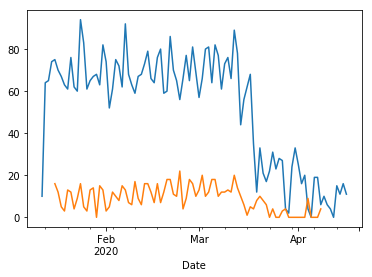

In [236]:
swq.set_index('Date').groupby(pd.Grouper(freq='D'))['Flight'].count().plot()
wal.set_index('Date').groupby(pd.Grouper(freq='D'))['Flight'].count().plot()

In [237]:
temp = df['Arrival'].str.split('(', expand=True)
df['ArrivalLoc'] = temp[0].str.strip()
temp = temp[1].str.split('/', expand=True)
df['ArrivalIATA'] = temp[0]
df['ArrivalICAO'] = temp[1]
df['ArrivalICAO'] = df['ArrivalICAO'].str.replace(')', '')

In [238]:
temp = df['Departure'].str.split('(', expand=True)
df['DepartureLoc'] = temp[0].str.strip()
temp = temp[1].str.split('/', expand=True)
df['DepartureIATA'] = temp[0]
df['DepartureICAO'] = temp[1]
df['DepartureICAO'] = df['DepartureICAO'].str.replace(')', '')

In [239]:
df.groupby('DepartureICAO')['Flight'].count().sort_values(ascending=False).head(30)

DepartureICAO
KMIA    1132
MUHA     359
KAEX     194
KBRO     194
MDSD     163
KIWA     144
KSAT     122
MUSC     120
MGGT     106
MUHG      82
MUCM      76
MWCR      67
KACY      66
MHLM      65
KELP      60
MDPC      58
KCSG      55
KIFP      54
KEWR      54
KGSO      54
KBNA      52
KRDU      48
KTPA      47
KMEM      45
TJSJ      41
KIAH      39
MUCU      38
KDAL      37
KPHL      37
KSYR      36
Name: Flight, dtype: int64

In [240]:
df.groupby(['DepartureICAO', 'ArrivalICAO'])['Flight'].count().sort_values(ascending=False).head(25)

DepartureICAO  ArrivalICAO
MUHA           KMIA           345
KMIA           MUHA           341
MDSD           KMIA           155
KMIA           MDSD           154
               MUSC           113
MUSC           KMIA           110
MUHG           KMIA            76
KMIA           MUHG            76
MUCM           KMIA            76
KMIA           MUCM            72
               MDPC            60
MDPC           KMIA            56
KAEX           KBRO            49
MUCU           KMIA            38
KMIA           MUCU            38
KSAT           KBRO            37
KMIA           KCSG            34
KBRO           MGGT            33
TJSJ           KMIA            33
MGGT           KIWA            31
KBRO           KAEX            30
KMIA           TJSJ            29
KBRO           MHLM            28
MUVR           KMIA            26
KIWA           KELP            25
Name: Flight, dtype: int64

In [241]:
ice_us = ["Alexandria, LA (AEX/KAEX)",
#           "Phoenix, AZ (AZA/KIWA)",
          "Brownsville, TX (BRO/KBRO)",
#           "El Paso, TX (ELP/KELP)",
#           "San Antonio, TX (SAT/KSAT)",
          "Yakima, WA (YKM/KYKM)"]

In [242]:
df[df['Departure'].isin(ice_us)].set_index('Date').groupby(pd.Grouper(freq='M'))['Flight'].count()

Date
2020-01-31     54
2020-02-29    110
2020-03-31    105
Freq: M, Name: Flight, dtype: int64

In [243]:
len(set(df['Aircraft']))

52

In [244]:
set(df['Aircraft'].head())

{'B734 (N430XA)', 'B734 (N441US)'}

In [245]:
ice_flights = set(df[df['Departure'].isin(ice_us)]['Aircraft'])

In [246]:
ice_flights = ice_flights.union(set(df[df['Arrival'].isin(ice_us)]['Aircraft']))

In [247]:
df[df['Aircraft'].isin(ice_flights)].set_index('Date').groupby(pd.Grouper(freq='M'))['Aircraft'].count()

Date
2020-01-31     937
2020-02-29    1414
2020-03-31    1099
2020-04-30     141
Freq: M, Name: Aircraft, dtype: int64

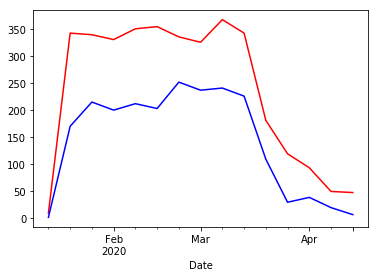

In [248]:
df[df['Aircraft'].isin(ice_flights)].set_index('Date').groupby(pd.Grouper(freq='W'))['Aircraft'].count().plot(c='r')
df[~df['Aircraft'].isin(ice_flights)].set_index('Date').groupby(pd.Grouper(freq='W'))['Aircraft'].count().plot(c='b')

In [249]:
df[df['Aircraft'].isin(ice_flights)]

,Date,Flight,Departure,STD,Arrival,STA,Aircraft,Status,Duration,Airline,ArrivalLoc,ArrivalIATA,ArrivalICAO,DepartureLoc,DepartureIATA,DepartureICAO
0,2020-04-16,WQ3572,"Brownsville, TX(BRO/KBRO)",17:20 CDT,"Alexandria, LA(AEX/KAEX)",NaN,B734 (N430XA),Landed,01h10m,SwiftAir/iAero,"Alexandria, LA",AEX,KAEX,"Brownsville, TX",BRO,KBRO
1,2020-04-16,WQ3511,NaN,NaN,NaN,NaN,B734 (N441US),Status N/A,NaN,SwiftAir/iAero,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-04-16,WQ3510,"Miami, FL(MIA/KMIA)",NaN,"Columbus, GA(CSG/KCSG)",NaN,B734 (N441US),Status N/A,NaN,SwiftAir/iAero,"Columbus, GA",CSG,KCSG,"Miami, FL",MIA,KMIA
3,2020-04-16,WQ3569,"Alexandria, LA(AEX/KAEX)",06:30 CDT,"Minneapolis, MN(MSP/KMSP)",NaN,B734 (N430XA),Landed 08:51 CDT,02h12m,SwiftAir/iAero,"Minneapolis, MN",MSP,KMSP,"Alexandria, LA",AEX,KAEX
4,2020-04-16,WQ3570,"Minneapolis, MN(MSP/KMSP)",NaN,"Omaha, NE(OMA/KOMA)",NaN,B734 (N430XA),Landed 10:38 CDT,00h50m,SwiftAir/iAero,"Omaha, NE",OMA,KOMA,"Minneapolis, MN",MSP,KMSP
6,2020-04-16,WQ3511,"Columbus, GA(CSG/KCSG)",09:40 EDT,"Alexandria, LA(AEX/KAEX)",NaN,B734 (N441US),Landed,01h19m,SwiftAir/iAero,"Alexandria, LA",AEX,KAEX,"Columbus, GA",CSG,KCSG
7,2020-04-16,WQ3571,"Omaha, NE(OMA/KOMA)",12:10 CDT,"Kansas City, MO(MCI/KMCI)",NaN,B734 (N430XA),Landed 12:06 CDT,00h29m,SwiftAir/iAero,"Kansas City, MO",MCI,KMCI,"Omaha, NE",OMA,KOMA
8,2020-04-16,WQ3514,"Brownsville, TX(BRO/KBRO)",13:40 CDT,"Miami, FL(MIA/KMIA)",NaN,B734 (N441US),Landed 17:34 EDT,02h12m,SwiftAir/iAero,"Miami, FL",MIA,KMIA,"Brownsville, TX",BRO,KBRO
9,2020-04-16,WQ3580,"Kansas City, MO(MCI/KMCI)",13:55 CDT,"Brownsville, TX(BRO/KBRO)",NaN,B734 (N430XA),Landed,02h16m,SwiftAir/iAero,"Brownsville, TX",BRO,KBRO,"Kansas City, MO",MCI,KMCI
10,2020-04-16,WQ3536,"Brownsville, TX(BRO/KBRO)",14:00 CDT,"El Paso, TX(ELP/KELP)",NaN,B733 (N626SW),Landed 14:36 MDT,01h46m,SwiftAir/iAero,"El Paso, TX",ELP,KELP,"Brownsville, TX",BRO,KBRO


In [250]:
targets = ['MGGT']
stop_cols = ['DepartureICAO', 'ArrivalICAO']

In [251]:
target_found = df[stop_cols].apply(lambda x: x.isin(targets)).sum(axis=1) > 0

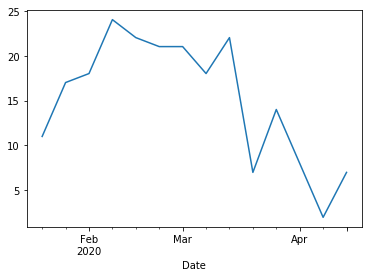

In [252]:
df[target_found].set_index('Date').groupby(pd.Grouper(freq='W'))['Flight'].count().plot()

In [253]:
df[df['Arrival'] == 'Guatemala City (GUA/MGGT)'].set_index('Date').groupby(pd.Grouper(freq='W'))['Flight'].count()

Date
2020-01-19    4
2020-01-26    6
2020-02-02    6
2020-02-09    7
2020-02-16    7
2020-02-23    6
2020-03-01    7
2020-03-08    6
2020-03-15    8
2020-03-22    3
2020-03-29    7
2020-04-05    2
Freq: W-SUN, Name: Flight, dtype: int64

In [254]:
df['Date'].min()

Timestamp('2020-01-12 00:00:00')

In [255]:
df['Date'].max()

Timestamp('2020-04-16 00:00:00')

In [256]:
df.to_csv('../output/RadarboxSWQ+WAL20200112-20200416.csv', sep=',', quotechar='"', encoding='utf-8')

In [257]:
mggt_all = df[target_found].sort_values(by='Date', ascending=False).set_index('Date')

In [258]:
mggt_all.loc['2020-04']

,Flight,Departure,STD,Arrival,STA,Aircraft,Status,Duration,Airline,ArrivalLoc,ArrivalIATA,ArrivalICAO,DepartureLoc,DepartureIATA,DepartureICAO
Date,,,,,,,,,,,,,,,
2020-04-15,WQ3509,Guatemala City(GUA/MGGT),19:15 CST,"Alexandria, LA(AEX/KAEX)",NaN,B734 (N430XA),Landed,02h40m,SwiftAir/iAero,"Alexandria, LA",AEX,KAEX,Guatemala City,GUA,MGGT
2020-04-14,WQ3535,Guatemala City(GUA/MGGT),17:30 CST,"Brownsville, TX(BRO/KBRO)",NaN,B733 (N626SW),Landed,02h13m,SwiftAir/iAero,"Brownsville, TX",BRO,KBRO,Guatemala City,GUA,MGGT
2020-04-14,WQ3534,"Brownsville, TX(BRO/KBRO)",15:05 CDT,Guatemala City(GUA/MGGT),NaN,B733 (N626SW),Landed,02h09m,SwiftAir/iAero,Guatemala City,GUA,MGGT,"Brownsville, TX",BRO,KBRO
2020-04-13,WQ3553,"Alexandria, LA(AEX/KAEX)",13:35 CDT,Guatemala City(GUA/MGGT),NaN,B734 (N803TJ),Landed,02h34m,SwiftAir/iAero,Guatemala City,GUA,MGGT,"Alexandria, LA",AEX,KAEX
2020-04-13,WQ3554,Guatemala City(GUA/MGGT),NaN,"Brownsville, TX(BRO/KBRO)",NaN,B734 (N803TJ),Landed,01h56m,SwiftAir/iAero,"Brownsville, TX",BRO,KBRO,Guatemala City,GUA,MGGT
2020-04-13,WQ3520,Guatemala City(GUA/MGGT),NaN,"Brownsville, TX(BRO/KBRO)",NaN,B734 (N418US),Landed,01h55m,SwiftAir/iAero,"Brownsville, TX",BRO,KBRO,Guatemala City,GUA,MGGT
2020-04-13,WQ3519,"El Paso, TX(ELP/KELP)",12:45 MDT,Guatemala City(GUA/MGGT),NaN,B734 (N418US),Landed,03h14m,SwiftAir/iAero,Guatemala City,GUA,MGGT,"El Paso, TX",ELP,KELP
2020-04-07,WQ3528,"Brownsville, TX(BRO/KBRO)",09:35 CDT,Guatemala City(GUA/MGGT),NaN,B734 (N458UW),Landed,02h10m,SwiftAir/iAero,Guatemala City,GUA,MGGT,"Brownsville, TX",BRO,KBRO
2020-04-07,WQ3529,Guatemala City(GUA/MGGT),12:00 CST,"San Antonio, TX(SAT/KSAT)",NaN,B734 (N458UW),Landed 16:05 CDT,02h38m,SwiftAir/iAero,"San Antonio, TX",SAT,KSAT,Guatemala City,GUA,MGGT


In [259]:
mggt_all.to_csv('../output/MGGTAll20200112-20200416.csv', sep=',', quotechar='"', encoding='utf-8')